# NRL Feature Map and Machine Learning Model

## Package Imports

### NOTE THIS IS WORK IN PROGRESS 

In [1]:
!pip install scikit-learn
!pip install tensorflow
!pip install numpy
!pip install pandas

You should consider upgrading via the 'c:\users\beauh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\beauh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\beauh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\beauh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd 
import json
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

import ENVIRONMENT_VARIABLES as EV 


In [6]:
years_analysed = [2023]

## Extracting Data from the JSON

In [2]:
teams = ["Broncos", "Roosters", "Wests Tigers", "Rabbitohs", "Storm", "Eels", "Raiders", "Knights", "Dragons", "Sea Eagles", "Panthers", "Sharks", "Bulldogs", "Dolphins", "Titans", "Cowboys", "Warriors"]
variables =["Year", "Win", "Defense", "Attack", "Margin", "Home", "Versus",  "Round"]
years =  [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2022, 2023]

In [3]:
player_variables =["Name", "Points", "Tries", "All Run Metres", "Tackle Breaks", "Tackle Efficiency", "Kicking Metres",  "Offloads"]

### Player Team

In [7]:
years_arr = {}
with open('./data/player_statistics_2023.json', 'r') as file:
    data = json.load(file)
    data = data['PlayerStats']
    for year in years_analysed:
        years_arr[year] = data[years_analysed.index(year)][str(year)]
    

In [8]:
df = pd.DataFrame(columns=[f"{team} {variable}" for team in teams for variable in player_variables])

In [9]:
p_dfs = {}

def custom_sort(column_name):
    year, num = column_name.split('-')
    return int(year), int(num)


for team in teams:
    p_dfs[team] = pd.DataFrame(columns=[f"{year}-{round+1}" for round in range(0, 21) for year in years_analysed])
    p_dfs[team] = p_dfs[team][sorted(p_dfs[team].columns, key=custom_sort)]
    

In [10]:
p_dfs['Raiders']

,2023-1,2023-2,2023-3,2023-4,2023-5,2023-6,2023-7,2023-8,2023-9,2023-10,...,2023-12,2023-13,2023-14,2023-15,2023-16,2023-17,2023-18,2023-19,2023-20,2023-21


In [11]:
team_players = {}

for year in years_analysed:
    for i in range(0, 26):
        try:
            round = years_arr[year][i]
            round = round[str(i)]
            for round_game in round:
                for game in round_game:
                    game_split = game.split("-")
                    game_year = game_split[0]
                    game_round = game_split[1]
                    
                    game_split = game.split("v")
                    home_team = " ".join(game_split[0].split("-")[2:]).replace("-", " ").strip()
                    away_team = " ".join(game_split[-1:]).replace("-", " ").strip()

                    print(f"{home_team} v {away_team} - {game_year} - {game_round}")

                    
                    players = round_game[game]
                    player_round_stats = {} 
                    for player in players:
                        vals = [player[val] for val in  player_variables]
                        player_round_stats[vals[0]] = vals[1:]
                    
                    player_round_stats = list(player_round_stats.items())
                    player_round_stats_home, player_round_stats_away = player_round_stats[:18], player_round_stats[18:]
                    p_dfs[home_team][f"{year}-{i+1}"] = player_round_stats_home
                    p_dfs[away_team][f"{year}-{i+1}"] = player_round_stats_away

                    
                    
        except Exception as ex:
            print(ex)


Eels v Storm - 2023 - 1
Warriors v Knights - 2023 - 1
Panthers v Broncos - 2023 - 1
Sea Eagles v Bulldogs - 2023 - 1
Cowboys v Raiders - 2023 - 1
Sharks v Rabbitohs - 2023 - 1
Dolphins v Roosters - 2023 - 1
Wests Tigers v Titans - 2023 - 1
Panthers v Rabbitohs - 2023 - 2
Eels v Sharks - 2023 - 2
Broncos v Cowboys - 2023 - 2
Roosters v Warriors - 2023 - 2
Dolphins v Raiders - 2023 - 2
Storm v Bulldogs - 2023 - 2
Wests Tigers v Knights - 2023 - 2
Dragons v Titans - 2023 - 2
Sea Eagles v Eels - 2023 - 3
Knights v Dolphins - 2023 - 3
Roosters v Rabbitohs - 2023 - 3
Titans v Storm - 2023 - 3
Cowboys v Warriors - 2023 - 3
Broncos v Dragons - 2023 - 3
Bulldogs v Wests Tigers - 2023 - 3
Raiders v Sharks - 2023 - 3
Eels v Panthers - 2023 - 4
Storm v Wests Tigers - 2023 - 4
Dolphins v Broncos - 2023 - 4
Cowboys v Titans - 2023 - 4
Rabbitohs v Sea Eagles - 2023 - 4
Warriors v Bulldogs - 2023 - 4
Knights v Raiders - 2023 - 4
Dragons v Sharks - 2023 - 4
Roosters v Eels - 2023 - 5
Raiders v Panthers

In [12]:
p_dfs['Knights']

,2023-1,2023-2,2023-3,2023-4,2023-5,2023-6,2023-7,2023-8,2023-9,2023-10,...,2023-13,2023-14,2023-15,2023-16,2023-17,2023-18,2023-19,2023-20,2023-21,2023-22
0,"(Lachlan Miller, [-, -, 181, 11, 66.67%, 12, -])","(Lachlan Miller, [-, -, 161, 9, 75%, -, -])","(Lachlan Miller, [10, 2, 212, 6, 75%, -, 1])","(Lachlan Miller, [4, -, 255, 9, 75%, 4, 2])","(Lachlan Miller, [4, -, 282, 13, 66.67%, -, -])","(Lachlan Miller, [10, -, 193, 6, 83.33%, -, -])","(Lachlan Miller, [2, -, 123, 3, 85.71%, 53, 1])","(Lachlan Miller, [4, -, 151, 5, 40%, -, 1])","(Lachlan Miller, [4, -, 152, 6, 71.43%, 3, -])",NaN,...,"(Kalyn Ponga, [-, -, 169, 4, 66.67%, 133, 1])",NaN,"(Kalyn Ponga, [4, 1, 229, 10, 66.67%, 131, -])","(Kalyn Ponga, [-, -, 240, 8, 100%, -, 2])","(Kalyn Ponga, [4, 1, 98, 2, 35.71%, 84, 1])","(Kalyn Ponga, [22, -, 159, 9, 66.67%, -, 1])",NaN,"(Kalyn Ponga, [10, 1, 151, 6, 83.33%, 118, -])","(Kalyn Ponga, [6, -, 191, 5, 33.33%, 95, 2])","(Kalyn Ponga, [16, 1, 203, 6, 57.14%, 41, -])"
1,"(Hymel Hunt, [4, 1, 121, 3, 75%, -, 1])","(Hymel Hunt, [-, -, 102, 1, 75%, -, -])","(Hymel Hunt, [-, -, 113, 4, 100%, -, 1])","(Hymel Hunt, [-, -, 130, 4, 66.67%, -, -])","(Dane Gagai, [-, -, 214, 11, 78.57%, -, 2])","(Dominic Young, [4, 1, 105, 4, 66.67%, -, -])","(Dominic Young, [-, -, 143, 3, 100%, -, -])","(Dominic Young, [4, 1, 84, 1, 80%, -, 1])","(Dominic Young, [4, 1, 124, 4, 83.33%, -, 1])",NaN,...,"(Dominic Young, [4, 1, 227, 8, 50%, 22, -])",NaN,"(Dominic Young, [8, 2, 201, 4, 100%, -, -])","(Dominic Young, [8, 2, 123, 2, 33.33%, -, -])","(Dominic Young, [-, -, 104, 2, 66.67%, -, 3])","(Dominic Young, [-, -, 99, 6, 100%, 33, 1])",NaN,"(Dominic Young, [8, 2, 139, 7, 100%, -, -])","(Dominic Young, [4, 1, 121, 5, 50%, -, 1])","(Dominic Young, [4, 1, 136, 5, 100%, 40, -])"
2,"(Enari Tuala, [-, -, 40, -, 92.31%, -, -])","(Dane Gagai, [-, -, 173, 5, 100%, 26, -])","(Dane Gagai, [-, -, 165, 4, 80%, -, -])","(Dane Gagai, [4, 1, 185, 7, 94.74%, -, 4])","(Bradman Best, [-, -, 177, -, 83.33%, -, 2])","(Dane Gagai, [-, -, 174, 5, 77.78%, -, 2])","(Dane Gagai, [-, -, 108, -, 80%, -, 1])","(Dane Gagai, [-, -, 237, 13, 90.91%, -, 2])","(Dane Gagai, [-, -, 130, 7, 77.14%, -, 3])",NaN,...,"(Dane Gagai, [-, -, 165, 4, 85.71%, -, 1])",NaN,"(Dane Gagai, [-, -, 148, 6, 75.86%, 4, 2])","(Dane Gagai, [-, -, 176, 10, 81.48%, 12, 2])","(Dane Gagai, [-, -, 168, 8, 78.95%, -, 1])","(Enari Tuala, [4, 1, 78, 1, 100%, -, -])",NaN,"(Bradman Best, [4, 1, 126, 1, 69.57%, -, -])","(Dane Gagai, [-, -, 141, 3, 83.33%, 2, 2])","(Dane Gagai, [-, -, 241, 5, 95%, -, 1])"
3,"(Bradman Best, [-, -, 71, 3, 80%, -, 1])","(Bradman Best, [-, -, 115, -, 80%, 1, -])","(Bradman Best, [-, -, 146, 2, 100%, -, 1])","(Bradman Best, [4, 1, 196, 2, 90%, -, -])","(Greg Marzhew, [4, 1, 234, 7, 100%, 13, 1])","(Bradman Best, [-, -, 135, 1, 81.25%, 16, 1])","(Bradman Best, [-, -, 80, 2, 73.33%, -, 1])","(Bradman Best, [-, -, 155, 4, 88.24%, -, -])","(Bradman Best, [-, -, 96, 3, 72.22%, -, -])",NaN,...,"(Bradman Best, [4, 1, 197, 8, 100%, -, 1])",NaN,"(Bradman Best, [-, -, 115, 1, 76.47%, -, 1])","(Bradman Best, [4, 1, 224, 3, 80%, -, -])","(Bradman Best, [-, -, 109, 3, 77.78%, -, 2])","(Bradman Best, [12, 3, 219, 7, 69.23%, -, 3])",NaN,"(Greg Marzhew, [4, 1, 231, 9, 83.33%, -, -])","(Bradman Best, [4, 1, 104, 4, 81.82%, -, 1])","(Bradman Best, [-, -, 94, 3, 86.96%, -, -])"
4,"(Dominic Young, [-, -, 80, -, 60%, -, -])","(Dominic Young, [8, 2, 177, 9, 100%, -, -])","(Dominic Young, [-, -, 172, 1, 66.67%, -, -])","(Greg Marzhew, [8, 2, 274, 10, 100%, -, -])","(Tyson Gamble, [-, -, 71, 3, 86.67%, 28, 1])","(Greg Marzhew, [8, 2, 151, 5, -, -, -])","(Greg Marzhew, [-, -, 155, 8, 100%, -, 1])","(Greg Marzhew, [4, 1, 155, 9, 40%, -, -])","(Greg Marzhew, [-, -, 206, 7, 25%, -, -])",NaN,...,"(Greg Marzhew, [12, 3, 182, 13, 100%, -, 1])",NaN,"(Greg Marzhew, [-, -, 227, 6, 33.33%, -, -])","(Enari Tuala, [-, -, 155, 3, -, 22, -])","(Greg Marzhew, [-, -, 222, 8, 80%, -, 1])","(Greg Marzhew, [4, 1, 214, 15, 60%, -, -])

### Match Data

In [13]:
years = [2023]
years_arr = {}
with open('./data/nrl_data_multi_years_2.json', 'r') as file:
    data = json.load(file)
    data = data['NRL']
    for year in years:
        years_arr[year] = data[years.index(year)][str(year)]
    

In [14]:
df = pd.DataFrame(columns=[f"{team} {variable}" for team in teams for variable in variables])


In [15]:
all_store = []
for year in years:
    for round in range(0, 26):
        try:
            round_data = years_arr[year][round][str(round+1)]
            
            # Create an empty feature array 
            round_store = np.zeros([len(teams)*len(variables)], dtype=int)
            round_teams = []
            for game in round_data:
                h_team = game['Home']
                h_score = int(game['Home_Score'])
                a_team = game['Away']
                a_score = int(game['Away_Score'])
                
                # win or lose
                h_team_win = h_score >= a_score
                a_team_win = a_score >= h_score
                
                # home
                h_home = 1
                a_home = 0
                
                # versus
                h_versus = teams.index(a_team)
                a_versus = teams.index(h_team)
                
                # Defense (points let in)
                h_team_defense = a_score
                a_team_defense = h_score  
                
                # Attack Points scored
                h_team_attack = h_score 
                a_team_attack = a_score   
                
                # Margin
                h_team_margin =  h_score-a_score   
                a_team_margin =  a_score-h_score        
                
                # Keep track of which teams played to work out which teams had a bye 
                round_teams.append(h_team)
                round_teams.append(a_team)
                
                
                # Find the index of the team in the overaching array 
                a_team_idx = teams.index(a_team)
                h_team_idx = teams.index(h_team)
                
                # Feature map index
                a_team_idx_fm = a_team_idx*len(variables)
                h_team_idx_fm = h_team_idx*len(variables)
                
                # input(round_store)
                # input(a_team_idx_fm)
                # populate the data
                round_store[a_team_idx_fm] = year
                round_store[a_team_idx_fm+1] = a_team_win
                round_store[a_team_idx_fm+2] = a_team_defense
                round_store[a_team_idx_fm+3] = a_team_attack
                round_store[a_team_idx_fm+4] = a_team_margin
                round_store[a_team_idx_fm+5] = a_home
                round_store[a_team_idx_fm+6] = a_versus
                round_store[a_team_idx_fm+7] = round+1
                round_store[h_team_idx_fm] = year
                round_store[h_team_idx_fm+1] = h_team_win
                round_store[h_team_idx_fm+2] = h_team_defense
                round_store[h_team_idx_fm+3] = h_team_attack
                round_store[h_team_idx_fm+4] = h_team_margin
                round_store[h_team_idx_fm+5] = h_home
                round_store[h_team_idx_fm+6] = h_versus
                round_store[h_team_idx_fm+7] = round+1
                
            # input(round_teams)
            bye_teams = list(set(teams) - set(round_teams))
            for bye_team in bye_teams:
                b_team_idx = teams.index(bye_team)
                b_team_idx_fm = b_team_idx*len(variables)
                round_store[b_team_idx_fm] = year
                round_store[b_team_idx_fm+1] = -1
                round_store[b_team_idx_fm+2] = -1
                round_store[b_team_idx_fm+3] = -1
                round_store[b_team_idx_fm+4] = 0
                round_store[b_team_idx_fm+5] = -1
                round_store[b_team_idx_fm+6] = -1
                round_store[b_team_idx_fm+7] = round+1
                
            all_store.append(round_store)
            # Create an array with the same size as the DataFrame

            # Add the new row to the DataFrame using loc
            df.loc[len(df)] = round_store
        except:
            pass
df

,Broncos Year,Broncos Win,Broncos Defense,Broncos Attack,Broncos Margin,Broncos Home,Broncos Versus,Broncos Round,Roosters Year,Roosters Win,...,Cowboys Versus,Cowboys Round,Warriors Year,Warriors Win,Warriors Defense,Warriors Attack,Warriors Margin,Warriors Home,Warriors Versus,Warriors Round
0,2023,1,12,13,1,0,10,1,2023,0,...,6,1,2023,1,12,20,8,1,7,1
1,2023,1,16,28,12,1,15,2,2023,1,...,0,2,2023,0,20,12,-8,0,1,2
2,2023,1,18,40,22,1,8,3,2023,1,...,16,3,2023,1,12,26,14,0,15,3
3,2023,1,12,18,6,0,13,4,2023,-1,...,14,4,2023,1,14,16,2,1,12,4
4,2023,1,12,46,34,1,2,5,2023,1,...,12,5,2023,1,30,32,2,0,11,5
5,2023,0,20,14,-6,1,6,6,2023,0,...,13,6,2023,0,34,24,-10,0,7,6
6,2023,1,26,43,17,0,14,7,2023,0,...,16,7,2023,1,14,22,8,1,15,7
7,2023,1,16,26,10,0,5,8,2023,1,...,7,8,2023,0,30,22,-8,0,4,8
8,2023,0,32,6,-26,1,3,9,2023,1,...,11,9,2023,0,14,0,-14,1,1,9
9,2023,1,6,32,26,0,9,10,2023,0,...,1,10,2023,0,18,6,-12,1,10,10


### Creating the Feature Map

In [61]:
GAME_HISTORY = 3
import statistics

def get_game_history(year, round_, team):
    # Filter by year
    filtered_df = df[df[team + " Year"] == year]
    # # Remove all byes
    filtered_df = filtered_df.iloc[round_-GAME_HISTORY-1:round_-1] 
    
    byes = len(filtered_df[filtered_df[team + " Win"] == -1])
    
    filtered_df = filtered_df[filtered_df[team + " Win"] != -1]
    
    
    win = filtered_df[team+ " Win"].mean()
    defense = filtered_df[team+ " Defense"].median()
    attack = filtered_df[team+ " Attack"].median()
    margin = filtered_df[team+ " Margin"].median()
    
    defense_mean = filtered_df[team+ " Defense"].mean()
    attack_mean = filtered_df[team+ " Attack"].mean()
    margin_mean = filtered_df[team+ " Margin"].mean()
    
    
    games_at_home = filtered_df[team+ " Home"].mean()
    
    
    # Now get the player data
    selected_columns = [f"{year}-{i_game}" for i_game in range(round_-GAME_HISTORY, round_)]
    player_data = p_dfs[team][selected_columns]
    
    main_17 = [] 
    for _, row in player_data.iterrows():
        p_performance = 0 
        for player in row:
            if pd.isna(player):
                continue
            player_data = player[1]
            tries = player_data[1]
            a_r_m = player_data[2]
            t_b = player_data[3]
            k_m = player_data[5]
            o = player_data[6]

            # Use the int() function to convert the elements to integers
            tries = float(tries) if tries != '-' else 0
            a_r_m = float(a_r_m) if a_r_m != '-' else 0
            t_b = float(t_b) if t_b != '-' else 0
            t_e = float(player_data[4].strip('%')) if player_data[4] != '-' else 0
            k_m = float(k_m) if k_m != '-' else 0
            o = float(o) if o != '-' else 0
            
            p_performance += statistics.mean([tries,a_r_m,t_b,t_e,k_m,o])
        main_17.append(p_performance/(GAME_HISTORY-byes))

    return win, defense, attack, margin, byes, games_at_home, defense_mean, attack_mean, margin_mean, year
    

### Creating the Learning Data / extending upon the feature map

In [62]:
X = []
y = [] 
# Input: Team, Other Team Team Stats, Other Team Stats
# Output: Team, win/lose, other team, win/lose

for team in teams:
    # Skip the game history as we dont want to break the calibration
    versed_teams = df[team+ " Versus"]
    wins = df[team+ " Win"]
    rounds = df[team+ " Round"]
    years = df[team+ " Year"]
    margins = df[team+ " Margin"]
    
    c_team_idx = teams.index(team)
    
    
    
    for versed_team, win, round, year, margin in zip(versed_teams, wins, rounds, years, margins):
        # Skip all byes  or games with no momentum
        if win == -1 or round <= GAME_HISTORY:
            continue
        
        
        # dosent take into account for ties, look into this harder later 
        winning_team = -1
        if win == 1:
            v_win_ = 0
            winning_team = c_team_idx
        else:
            v_win_ = 1
            winning_team = versed_team
            
        if abs(margin) > 13:
            big_win = 1
        else:
            big_win = 0
        
        
        
        # Current team, vsed team, who wins, current_team_stats, vsed_team_stats
        try:
            # X.append([c_team_idx, versed_team, *get_game_history(year, round, team), *get_game_history(year, round, teams[versed_team])])
            # y.append([c_team_idx, versed_team, win, v_win_, margin])
            X.append([*get_game_history(year, round, team), *get_game_history(year, round, teams[versed_team])])
            y.append([win, v_win_])
        except:
            pass

### Training the Data

In [65]:
# Create a Random Forest Regressor model
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, shuffle=True)


# Convert lists to NumPy arrays
X_train, X_val, y_train, y_val = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Create a neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(2))

# Training loop to track R-squared scores on both training and validation sets
num_epochs = 1000  # You can adjust the number of epochs as needed
# Define a learning rate schedule
initial_learning_rate = 0.00001
final_learning_rate = 0.001
batch_size = 32
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/num_epochs)
steps_per_epoch = int(len(X_train_scaled)/batch_size)

lr_schedule = ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)
previous_loss = None
no_loss_change_epochs = 0
loss_change_threshold = 1e-5

# Compile the model
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='mse')

# Lists to store the R-squared scores during training
train_r2_scores = []
val_r2_scores = []
train_losses = []  


for epoch in range(num_epochs):
    # Train the model on the training data
    history = model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=1, verbose=2)
    
    # Calculate R-squared scores on the training and validation sets
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Store the R-squared scores for each epoch
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)
    
    
    train_loss = history.history['loss'][0]
    train_losses.append(train_loss)
    
    if previous_loss is not None and abs(previous_loss - train_loss) < loss_change_threshold:
        no_loss_change_epochs += 1
    else:
        no_loss_change_epochs = 0
    
    # Set the current loss as the previous loss for the next epoch
    previous_loss = train_loss
    
    # If there have been no loss changes for a certain number of consecutive epochs, stop training
    if no_loss_change_epochs >= 5:
        print(f"Training stopped early at epoch {epoch + 1} due to no significant loss change.")
        break
    

# Final R-squared scores
final_train_r2 = train_r2_scores[-1]
final_val_r2 = val_r2_scores[-1]

print(f"Final Training R-squared: {final_train_r2:.4f}")
print(f"Final Validation R-squared: {final_val_r2:.4f}")

7/7 - 1s - loss: 1.7451 - 1s/epoch - 169ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.6974 - 19ms/epoch - 3ms/step
3/3 [==============================] - 0s 1ms/step
7/7 - 0s - loss: 1.6617 - 17ms/epoch - 2ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.7225 - 18ms/epoch - 3ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.6874 - 16ms/epoch - 2ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.6308 - 17ms/epoch - 2ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.6798 - 16ms/epoch - 2ms/step
3/3 [==============================] - 0s 1ms/step
7/7 - 0s - loss: 1.6362 - 18ms/epoch - 3ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.6798 - 19ms/epoch - 3ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s - loss: 1.6616 - 19ms/epoch - 3ms/step
3/3 [==============================] - 0s 2ms/step
7/7 - 0s -

Final Training R-squared: 0.8419
Final Test R-squared: -0.8307


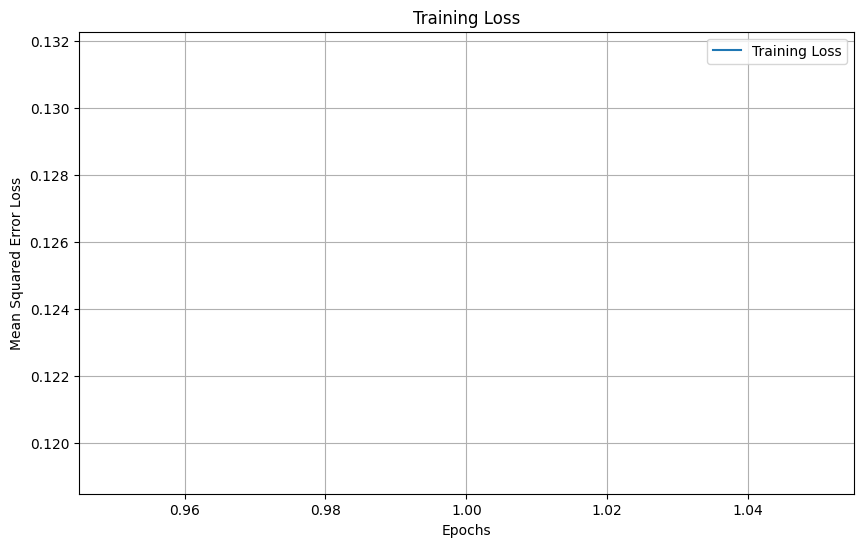

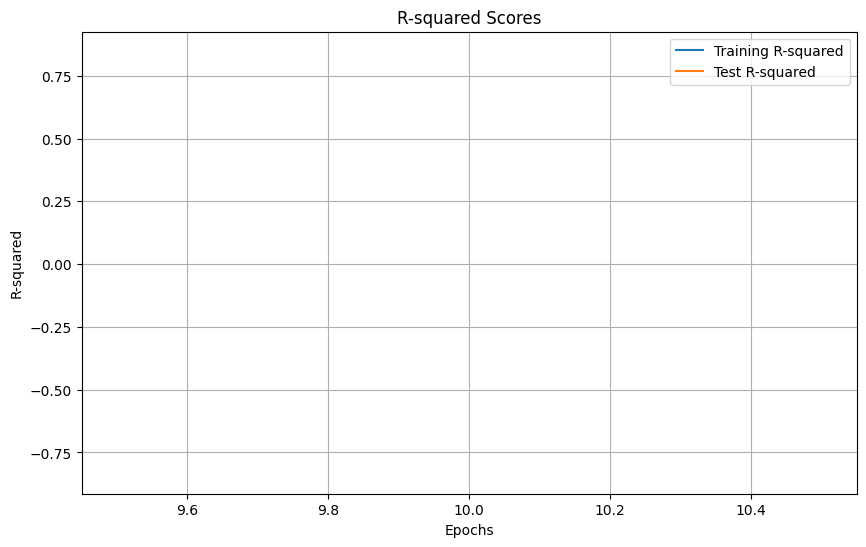

In [66]:
# Calculate R-squared scores at regular intervals
interval = 10
train_r2_scores = [r2_score(y_train, y_train_pred)]
test_r2_scores = [r2_score(y_test, y_test_pred)]

for epoch in range(interval, len(history.history['loss']), interval):
    train_r2_scores.append(r2_score(y_train, model.predict(X_train_scaled)))
    test_r2_scores.append(r2_score(y_test, model.predict(X_test_scaled)))

# Final R-squared scores
final_train_r2 = train_r2_scores[-1]
final_test_r2 = test_r2_scores[-1]

print(f"Final Training R-squared: {final_train_r2:.4f}")
print(f"Final Test R-squared: {final_test_r2:.4f}")

# Plotting training graph
epochs = len(history.history['loss'])
x_epochs = np.arange(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(x_epochs, history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()
plt.show()

# Plotting R-squared graph
plt.figure(figsize=(10, 6))
x_intervals = np.arange(1, len(train_r2_scores) + 1) * interval
plt.plot(x_intervals, train_r2_scores, label='Training R-squared')
plt.plot(x_intervals, test_r2_scores, label='Test R-squared')
plt.xlabel('Epochs')
plt.ylabel('R-squared')
plt.title('R-squared Scores')
plt.legend()
plt.grid()
plt.show()

#### Visualising the ML Model

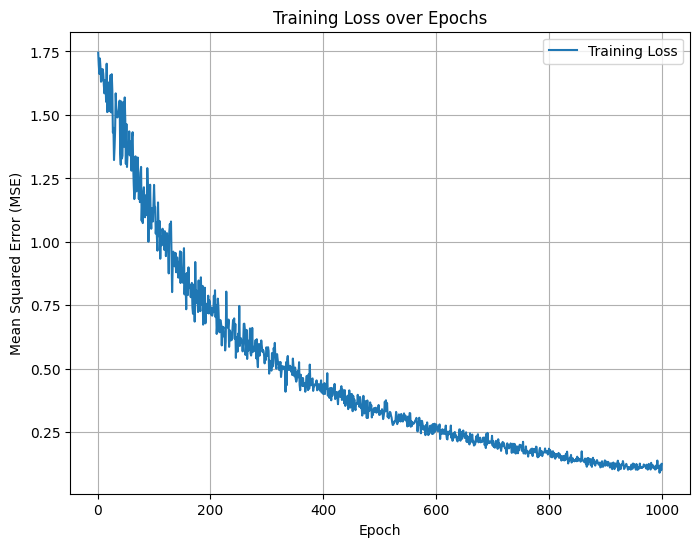

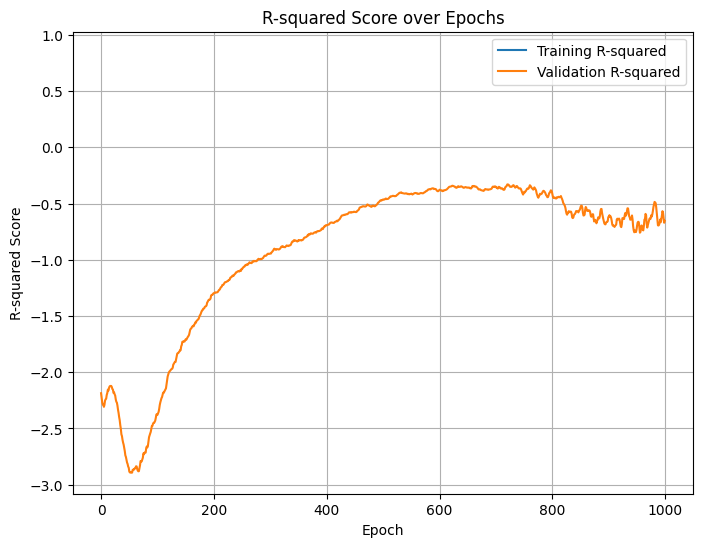

3/3 [==============================] - 0s 3ms/step


IndexError: index 2 is out of bounds for axis 1 with size 2

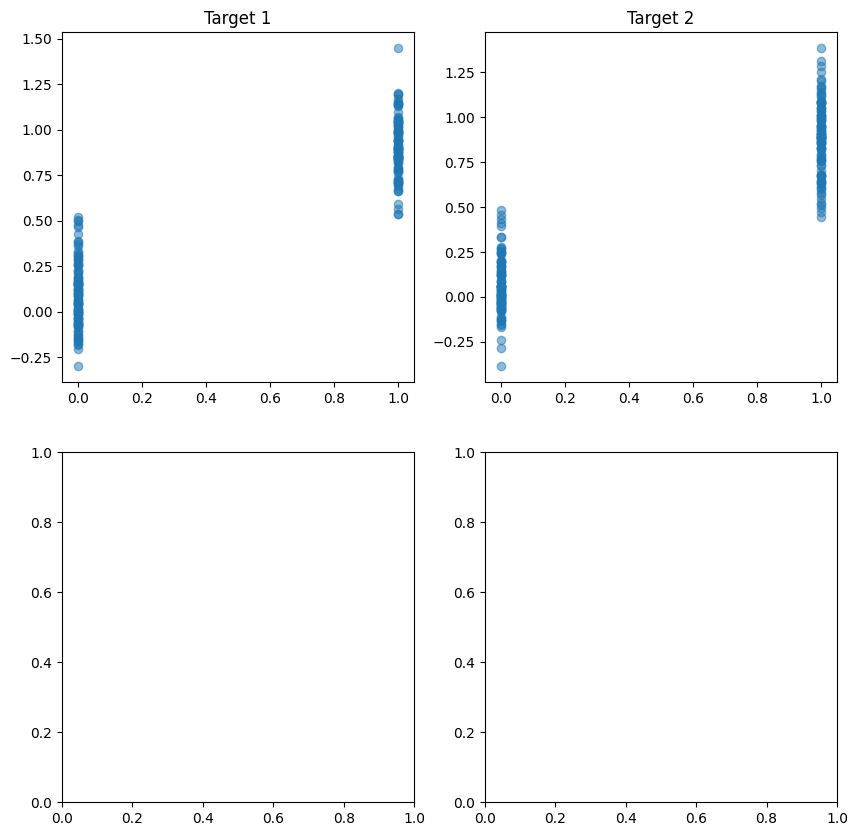

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the Loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting R-squared scores
plt.figure(figsize=(8, 6))
plt.plot(train_r2_scores, label='Training R-squared')
plt.plot(val_r2_scores, label='Validation R-squared')
plt.xlabel('Epoch')
plt.ylabel('R-squared Score')
plt.title('R-squared Score over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of true vs. predicted values
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(y_train[:, 0], y_train_pred[:, 0], alpha=0.5)
axs[0, 0].set_title('Target 1')
axs[0, 1].scatter(y_train[:, 1], y_train_pred[:, 1], alpha=0.5)
axs[0, 1].set_title('Target 2')
axs[1, 0].scatter(y_train[:, 2], y_train_pred[:, 2], alpha=0.5)
axs[1, 0].set_title('Target 3')
axs[1, 1].scatter(y_train[:, 3], y_train_pred[:, 3], alpha=0.5)
axs[1, 1].set_title('Target 4')

for ax in axs.flat:
    ax.set(xlabel='True Values', ylabel='Predicted Values')

plt.tight_layout()
plt.show()

### Testing the Prediction

In [68]:
# teams = ["Broncos", "Roosters", "Wests Tigers", "Rabbitohs", "Storm", "Eels", "Raiders", "Knights", "Dragons", "Sea Eagles", "Panthers", "Sharks", "Bulldogs", "Dolphins", "Titans", "Cowboys", "Warriors"]

wkd_matches = [["Roosters", "Sea Eagles"], ["Titans", "Warriors"], ["Panthers", "Storm"], ["Cowboys", "Broncos"], ["Dolphins", "Knights"], ["Rabbitohs", "Sharks"], ["Eels", "Dragons"], ["Raiders", "Wests Tigers"]]

# wkd_matches = [["Broncos", "Roosters"], ["Wests Tigers", "Rabbitohs"], ["Storm", "Eels"], ["Raiders", "Knights"], ["Dragons", "Sea Eagles"], ["Panthers", "Sharks"], ["Bulldogs", "Dolphins"], ["Titans", "Cowboys"]]

# wkd_matches = [["Dragons", "Wests Tigers"], ["Warriors", "Raiders"], ["Rabbitohs", "Broncos"], ["Titans", "Roosters"], ["Knights", "Storm"], ["Cowboys", "Eels"], ["Panthers", "Bulldogs"], ["Sharks", "Sea Eagles"]]

for wkd_match in wkd_matches:

    team_1 = int(teams.index(wkd_match[0]))
    team_2 = int(teams.index(wkd_match[1]))

    pred_in_2 = [*get_game_history(2023, 22, teams[int(team_1)]), *get_game_history(2023, 22, teams[int(team_2)])]

    predictions = model.predict([pred_in_2], verbose=0)
    predictions = predictions[0]
    if predictions[0] > predictions[1]:
        print(f"{teams[team_1]} wins\t\t {teams[team_1]}: {predictions[0]:.4f}\t{teams[team_2]}: {predictions[1]:.4f}\t\tBig Win {predictions[2]}")
    else:
        print(f"{teams[team_2]} wins\t\t {teams[team_1]}: {predictions[0]:.4f}\t{teams[team_2]}: {predictions[1]:.4f}\t\tBig Win {predictions[2]}")


IndexError: index 2 is out of bounds for axis 0 with size 2